In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
dataset = pd.read_csv('D:\\Downloads\\archive (3)\\qt_dataset.csv', encoding='windows-1252')
dataset.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive


In [21]:
dataset_cleaned = dataset.dropna()
dataset_cleaned

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive
...,...,...,...,...,...
9995,9995,95.0,124.0,97.0,Negative
9996,9996,88.0,70.0,100.0,Positive
9997,9997,99.0,56.0,105.0,Negative
9998,9998,92.0,49.0,98.0,Positive


In [22]:
X = dataset_cleaned.iloc[:, 1:-1].values
X

array([[ 98.,  65.,  95.],
       [ 96.,  92.,  95.],
       [ 95.,  92.,  99.],
       ...,
       [ 99.,  56., 105.],
       [ 92.,  49.,  98.],
       [ 85.,  52.,  99.]])

In [23]:
y = dataset_cleaned.iloc[:, -1].values
y

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [24]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 1, 1])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units=10, activation='relu'))
for i in range(3):
    dnn.add(tf.keras.layers.Dense(units=15, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [28]:
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

Epoch 1/100


250/250 [==============================] - 2s 2ms/step - loss: 0.3444 - accuracy: 0.8698
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9377
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9445
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9506
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9553
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9630
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9664
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9707
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9739
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9747
E

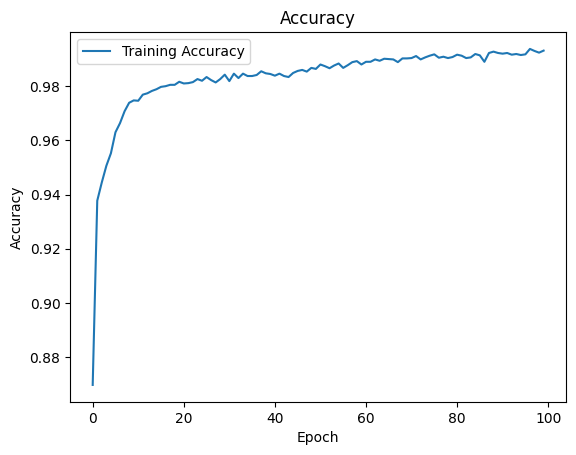

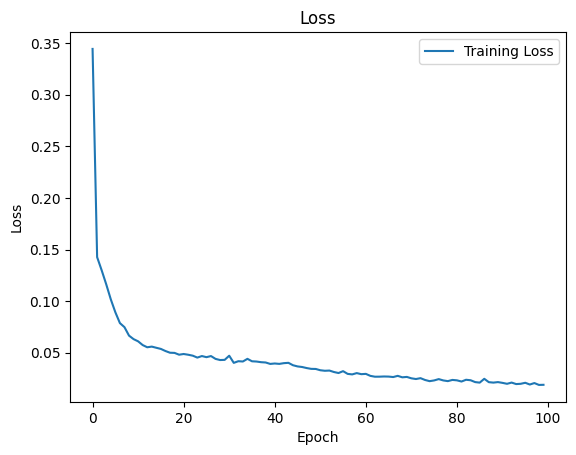

In [29]:
history = dnn.fit(X_train, y_train, batch_size=32, epochs=100)

# Plot accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
#0 negative 1 positif

In [31]:
print(dnn.predict(sc.transform([[94, 100, 103]])))

1/1 [==============================] - 0s 117ms/step
[[0.9907396]]


In [32]:
y_pred = dnn.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[995  10]
 [  4 991]]


0.993

In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

F1 Score: 0.9929859719438877
Precision: 0.99000999000999
Recall: 0.9959798994974874


In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(dnn)
tflite_model = converter.convert()

with open('D:\Downloads\model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmptb63ocfr\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmptb63ocfr\assets
